<a href="https://colab.research.google.com/github/elif-s286/Deep-Learning/blob/main/Akbank_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# İMPORT LİBRARİES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble
import sklearn.linear_model
import sklearn.tree


In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LassoLars, LinearRegression, ElasticNet
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Gathering and Observing Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Project/Melbourne_housing_FULL.csv")

In [ ]:
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
shape= data.shape
size = data.size
print("Shape of data : ",shape)
print("Size of data : ",size)

Shape of data :  (34857, 21)
Size of data :  731997


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [ ]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [ ]:
def remove_outliers(data, col):
    z_scores = (data[col] - data[col].mean()) / data[col].std()
    data = data.loc[abs(z_scores) < threshold]
    return data

In [ ]:
columns_with_outliers = ['BuildingArea', 'Landsize']
threshold = 2
for col in columns_with_outliers:
    data = remove_outliers(data, col)

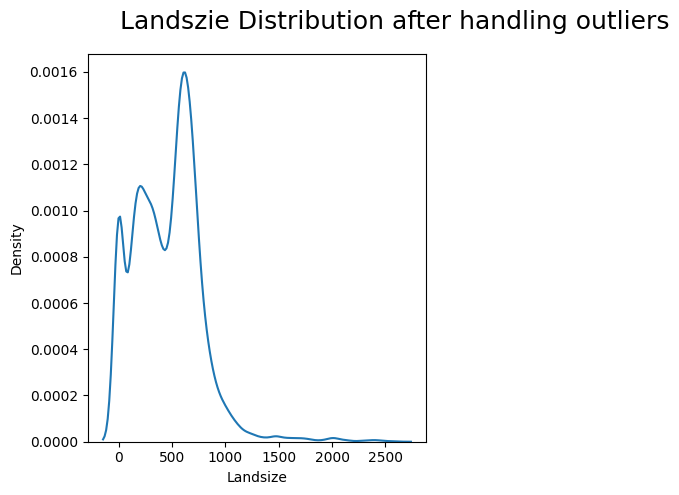

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Landszie Distribution after handling outliers", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = data['Landsize'])
plt.tight_layout()
plt.show()

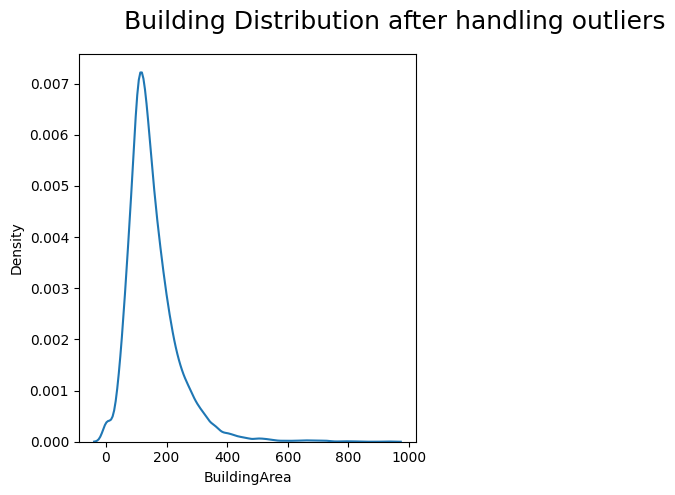

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Building Distribution after handling outliers", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = data['BuildingArea'])
plt.tight_layout()
plt.show()

In [ ]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            2725
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               179
Landsize            0
BuildingArea        0
YearBuilt         431
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
categorical_columns = ["Car","YearBuilt"]
for column in categorical_columns:
  data[column] = data[column].fillna(data[column].mode().iloc[0])

In [ ]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            2725
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
mean_X= data['Lattitude'].mean()
data['Lattitude'] = data['Lattitude'].fillna(mean_X)
mean_X_Lat= data['Longtitude'].mean()
data['Longtitude'] = data['Longtitude'].fillna(mean_X_Lat)

In [ ]:
mean = data["Price"].mean()
data["Price"] = data["Price"].fillna(mean)

In [ ]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Data Visualization:

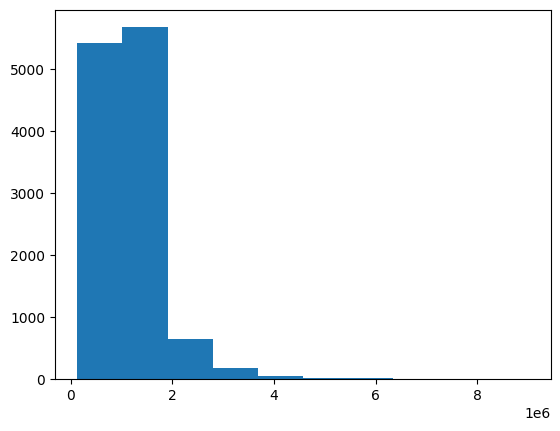

In [ ]:
x = data["Price"]
plt.hist(x)
plt.show()

<ipython-input-460-80994609ec96>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(data.corr())


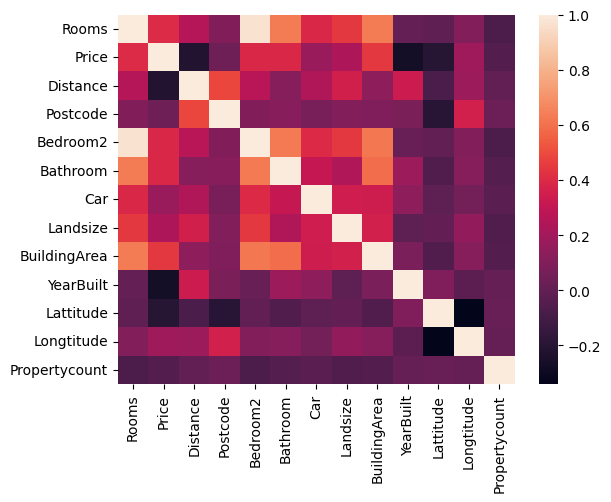

In [ ]:
dataplot=sns.heatmap(data.corr())

# displaying heatmap
plt.show()

In [ ]:
data.nunique()

Suburb             318
Address          11787
Rooms               10
Type                 3
Price             1874
Method               9
SellerG            277
Date                78
Distance           203
Postcode           197
Bedroom2            12
Bathroom             9
Car                 14
Landsize          1251
BuildingArea       697
YearBuilt          150
CouncilArea         33
Lattitude         7006
Longtitude        7529
Regionname           8
Propertycount      315
dtype: int64

In [ ]:
cat_cols = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
num_cols = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2','Bathroom', 'Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']
print(num_cols)

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [ ]:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in data[cat_cols] if 9 >= data[col].nunique() >2]
data = one_hot_encoder(data, ohe_cols, drop_first=True)
print(data)

           Suburb           Address  Rooms         Price  SellerG        Date  \
2      Abbotsford   25 Bloomburg St      2  1.035000e+06   Biggin   4/02/2016   
4      Abbotsford      5 Charles St      3  1.465000e+06   Biggin   4/03/2017   
6      Abbotsford       55a Park St      4  1.600000e+06   Nelson   4/06/2016   
7      Abbotsford      16 Maugie St      4  1.096668e+06   Nelson   6/08/2016   
11     Abbotsford      124 Yarra St      3  1.876000e+06   Nelson   7/05/2016   
...           ...               ...    ...           ...      ...         ...   
34849     Wollert   35 Kingscote Wy      3  5.700000e+05       RW  24/02/2018   
34850     Wollert  15 Rockgarden Wy      3  1.096668e+06       LJ  24/02/2018   
34853  Yarraville     29A Murray St      2  8.880000e+05  Sweeney  24/02/2018   
34854  Yarraville    147A Severn St      2  7.050000e+05      Jas  24/02/2018   
34856  Yarraville  3 Tarrengower St      2  1.020000e+06       RW  24/02/2018   

       Distance  Postcode  

In [ ]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
data.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,Abbotsford,25 Bloomburg St,-1.175134,-1.035355e-01,Biggin,4/02/2016,-1.257377,-0.426389,-1.148054,-0.917903,...,0,0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,-0.145981,6.183959e-01,Biggin,4/03/2017,-1.257377,-0.426389,-0.120505,0.429162,...,0,0,0,0,1,0,0,0,0,0
6,Abbotsford,55a Park St,0.883172,8.450488e-01,Nelson,4/06/2016,-1.257377,-0.426389,-0.120505,-0.917903,...,0,1,0,0,1,0,0,0,0,0
7,Abbotsford,16 Maugie St,0.883172,-3.909018e-16,Nelson,6/08/2016,-1.257377,-0.426389,-0.120505,0.429162,...,0,0,0,0,1,0,0,0,0,0
11,Abbotsford,124 Yarra St,-0.145981,1.308428e+00,Nelson,7/05/2016,-1.257377,-0.426389,0.907043,0.429162,...,0,0,0,0,1,0,0,0,0,0


# Model Selection

In [ ]:
data.isnull().sum()

Suburb                                   0
Address                                  0
Rooms                                    0
Price                                    0
SellerG                                  0
Date                                     0
Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
CouncilArea                              0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Type_t                                   0
Type_u                                   0
Method_PN                                0
Method_S                                 0
Method_SA                                0
Method_SN  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12006 entries, 2 to 34856
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 12006 non-null  object 
 1   Address                                12006 non-null  object 
 2   Rooms                                  12006 non-null  float64
 3   Price                                  12006 non-null  float64
 4   SellerG                                12006 non-null  object 
 5   Date                                   12006 non-null  object 
 6   Distance                               12006 non-null  float64
 7   Postcode                               12006 non-null  float64
 8   Bedroom2                               12006 non-null  float64
 9   Bathroom                               12006 non-null  float64
 10  Car                                    12006 non-null  float64
 11  La

In [ ]:
Y=data["Price"]
X=data.drop(columns=["Price","Date","Suburb","Address","SellerG","CouncilArea","Rooms"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
X.isnull().sum()

Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Type_t                                   0
Type_u                                   0
Method_PN                                0
Method_S                                 0
Method_SA                                0
Method_SN                                0
Method_SP                                0
Method_SS                                0
Method_VB                                0
Method_W                                 0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_

### Lineer Regression

In [ ]:
lin = LinearRegression()
model = lin.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(r2_score(y_test,y_predicted))
from sklearn.metrics import mean_squared_error

from math import sqrt
# Calculation of Mean Squared Error (MSE)
print(mean_squared_error(y_test,y_predicted))
print(sqrt(mean_squared_error(y_test, y_predicted)) )

0.5081919679401286
0.5194730085915096
0.7207447596698221


### Lasso Regression

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01)
model = clf.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(r2_score(y_test,y_predicted))
from sklearn.metrics import mean_squared_error

from math import sqrt
# Calculation of Mean Squared Error (MSE)
print(mean_squared_error(y_test,y_predicted))
print(sqrt(mean_squared_error(y_test, y_predicted)) )

0.5081919679401286
0.5194730085915096
0.7207447596698221


### Kernel Ridge

In [ ]:
KernelRidge = KernelRidge()
model = KernelRidge.fit(X_train,y_train)

y_predicted = model.predict(X_test)
print(r2_score(y_test,y_predicted))
from sklearn.metrics import mean_squared_error

from math import sqrt
# Calculation of Mean Squared Error (MSE)
print(mean_squared_error(y_test,y_predicted))
print(sqrt(mean_squared_error(y_test, y_predicted)) )

0.5022378270281647
0.5257620793091249
0.7250945312916964


### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
max_iter = [1000, 10000]
l1_ratio = np.arange(0.0, 1.0, 0.1)
tol = [0.5]

elasticnet_gscv = GridSearchCV(estimator=ElasticNet(),
                                param_grid={'alpha': alpha,
                                            'max_iter': max_iter,
                                            'l1_ratio': l1_ratio,
                                            'tol':tol},
                                scoring='r2',
                                cv=5)

In [ ]:
elasticnet_gscv.fit(X_train, y_train)
elasticnet_gscv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.8, 'max_iter': 1000, 'tol': 0.5}

In [ ]:
elasticnet = ElasticNet(alpha = elasticnet_gscv.best_params_['alpha'],
                        max_iter = elasticnet_gscv.best_params_['max_iter'],
                        l1_ratio = elasticnet_gscv.best_params_['l1_ratio'],
                        tol = elasticnet_gscv.best_params_['tol'])
model= elasticnet.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print(r2_score(y_test,y_predicted))
from sklearn.metrics import mean_squared_error

from math import sqrt
# Calculation of Mean Squared Error (MSE)
print(mean_squared_error(y_test,y_predicted))
print(sqrt(mean_squared_error(y_test, y_predicted)) )

0.5081919679401286
0.5194730085915096
0.7207447596698221


Text(0.5, 1.0, 'Coefficients in the ElasticNet Model')

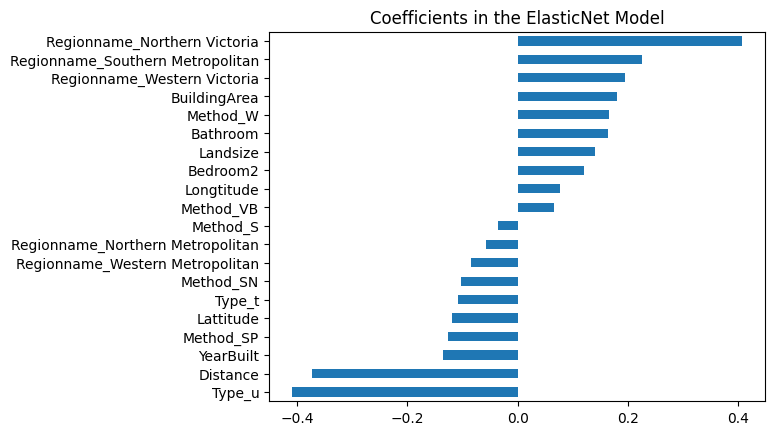

In [ ]:
coef = pd.Series(elasticnet.coef_, index = X_train.columns)
important_features = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
important_features.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")

## KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(X_train, y_train)
predicted_values = knn_model.predict(X_test)
print(r2_score(y_test,y_predicted))
from sklearn.metrics import mean_squared_error

from math import sqrt
# Calculation of Mean Squared Error (MSE)
print(mean_squared_error(y_test,y_predicted))
print(sqrt(mean_squared_error(y_test, y_predicted)) )

0.5081919679401286
0.5194730085915096
0.7207447596698221


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
model=RF_model.fit(X_train, y_train)

RF_model.score(X_train, y_train)
y_predicted=model.predict(X_test)
print(r2_score(y_test,y_predicted))
from sklearn.metrics import mean_squared_error

from math import sqrt
# Calculation of Mean Squared Error (MSE)
print(mean_squared_error(y_test,y_predicted))
print(sqrt(mean_squared_error(y_test, y_predicted)) )

0.6135616695681778
0.40817609526161724
0.6388866059494573


### Gradient Boosting Regression

In [ ]:
reg = GradientBoostingRegressor(learning_rate = 0.2, random_state=3)
model =reg.fit(X_train, y_train)
y_predicted=model.predict(X_test)
print(r2_score(y_test,y_predicted))
from sklearn.metrics import mean_squared_error

from math import sqrt
# Calculation of Mean Squared Error (MSE)
print(mean_squared_error(y_test,y_predicted))
print(sqrt(mean_squared_error(y_test, y_predicted)) )

0.6118787308710187
0.409953701911567
0.6402762699894218


### ADA boost

In [ ]:
regr = AdaBoostRegressor(AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2))
model = regr.fit(X_train, y_train)

y_predicted= model.predict(X_test)
print(r2_score(y_test,y_predicted))
from sklearn.metrics import mean_squared_error

from math import sqrt
# Calculation of Mean Squared Error (MSE)
print(mean_squared_error(y_test,y_predicted))
print(sqrt(mean_squared_error(y_test, y_predicted)) )

0.2069583161359556
0.8376515278326738
0.9152330456406574
